I'll look into the different offense/defense formation applied by teams as the strategy in the different plays, and the offense/defense personnels involved in the respective play. 

First of all, I’ll try to visualise  the offense/defense formation and players positions in a specific play by using unique play identification. 

In [10]:
#Importing necessary libraries and loading the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [4]:
df = pd.read_csv('/Users/Elham/NFL_Files/train.csv', low_memory=False) 
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [7]:
df.info() #Cheking the columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   GameId                  682154 non-null  int64  
 1   PlayId                  682154 non-null  int64  
 2   Team                    682154 non-null  object 
 3   X                       682154 non-null  float64
 4   Y                       682154 non-null  float64
 5   S                       682154 non-null  float64
 6   A                       682154 non-null  float64
 7   Dis                     682154 non-null  float64
 8   Orientation             682131 non-null  float64
 9   Dir                     682126 non-null  float64
 10  NflId                   682154 non-null  int64  
 11  DisplayName             682154 non-null  object 
 12  JerseyNumber            682154 non-null  int64  
 13  Season                  682154 non-null  int64  
 14  YardLine            

I'll try to draw a football field first

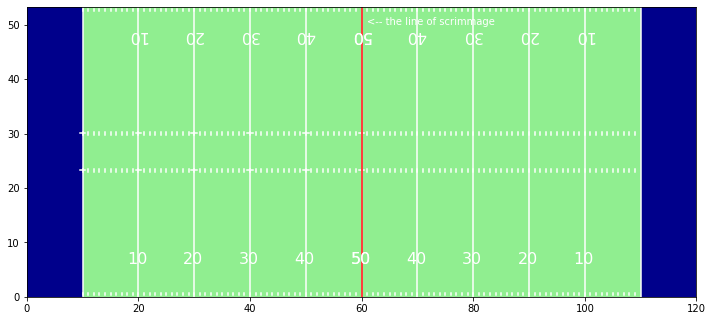

(<Figure size 864x383.76 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a247add90>)

In [67]:
def draw_field(scrimmage=True):
    
    """
    Input:
    
    Output:
    fig
    ax 
    """
    
    fig=plt.figure()
    fig.set_size_inches(12, 5.33) #Indicate the figure size according to the ratio of a football field
    ax=fig.add_subplot()
    plt.ylim(0, 53.3) #height of the field
    plt.xlim(0, 120) #Width of the field
    
    #Draw a football field
    field = patches.Rectangle([0,0], width = 120, height = 53.3, color='lightgreen', linewidth=0.1)
    
    #Draw two end zones
    RightEndZone = patches.Rectangle([0,0], width = 10, height = 53.3, color='darkblue', linewidth=0.1)
    LeftEndZone = patches.Rectangle([110,0], width = 10, height = 53.3, color='darkblue', linewidth=0.1)
    
    s = [field, RightEndZone, LeftEndZone]
    for i in s:
        ax.add_patch(i) #Add the patches to ax
    
    for x in ([10, 20, 30, 40, 50, 60]):
        ax.plot([x, x], [0, 53.3], color='white')
        ax.plot([50+x, 50+x], [0, 53.3], color='white') # Yard line
        
    for x in range(10,110):
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white') 
        
    for x in ([10, 20, 30, 40, 50, 60]):
        ax.plot([x-0.5, x+0.5], [23.34, 23.34], color='white')
        ax.plot([x-0.5, x+0.5], [30.06, 30.06], color='white') 
    
    for x in (20, 30, 40, 50, 60):
        plt.text(x-2, 6, str(x-10), color='white', fontsize='16')
        plt.text(x-2, 47.3, str(x-10), color='white', fontsize='16', rotation='180')
        plt.text(118-x, 6, str(x-10), color='white',fontsize='16')
        plt.text(118-x, 47.3, str(x-10), color='white', fontsize='16',rotation='180')
        
    if scrimmage:
        plt.plot([60, 60], [0, 53.3], color='red')
        plt.text(61, 50, '<-- the line of scrimmage', color='white') #line of scrimmage
        
    #plt.text()
    
    plt.show()
    
    return fig, ax

draw_field()
    